In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

### Reading the data

In [123]:
df = pd.read_csv('./Dataset/Unemployment_Rate.csv', parse_dates=['Date'])
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,2016-01-31,M,17.91,20626291,62.67
1,Andhra Pradesh,2016-02-29,M,9.98,19334918,53.50
2,Andhra Pradesh,2016-03-31,M,10.72,19646970,54.73
3,Andhra Pradesh,2016-04-30,M,5.51,18929583,49.76
4,Andhra Pradesh,2016-05-31,M,6.29,21163390,56.02
5,Andhra Pradesh,2016-06-30,M,4.51,18431598,47.81
6,Andhra Pradesh,2016-07-31,M,4.87,19486726,50.67
7,Andhra Pradesh,2016-08-31,M,4.03,18826519,48.45
8,Andhra Pradesh,2016-09-30,M,7.60,19863483,53.02
9,Andhra Pradesh,2016-10-31,M,10.06,19151488,52.44


### Data pre-processing

In [124]:
#Checking for NULL values
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
dtype: int64

In [126]:
df.Region.value_counts() 


Andhra Pradesh      66
Madhya Pradesh      66
West Bengal         66
Uttarakhand         66
Uttar Pradesh       66
Telangana           66
Tamil Nadu          66
Rajasthan           66
Punjab              66
Puducherry          66
Odisha              66
Assam               66
Maharashtra         66
Kerala              66
Karnataka           66
Jharkhand           66
Himachal Pradesh    66
Haryana             66
Gujarat             66
Delhi               66
Chhattisgarh        66
Bihar               66
India               66
Jammu & Kashmir     65
Goa                 65
Tripura             45
Meghalaya           42
Sikkim              31
Name: Region, dtype: int64

In [127]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Year'],
      dtype='object')

In [128]:
df_india = df.loc[df['Region'] == 'India']

### Data Analysis

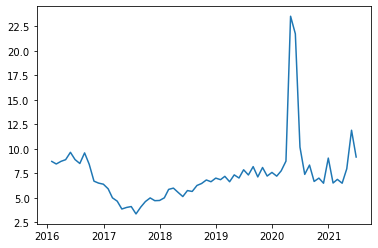

In [130]:
x=df_india['Date']
plt.plot(x, df_india['Estimated Unemployment Rate (%)'])

plt.show()

In [135]:
 df_stats = df[['Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)']]

round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),1766.0,8.32,7.17,0.00,3.78,6.36,10.66,7.585000e+01
Estimated Employed,1766.0,29631283.66,74043981.48,117542.00,3779239.00,10934317.50,23580263.50,4.184635e+08
Estimated Labour Participation Rate (%),1766.0,43.83,6.55,16.77,39.63,42.90,46.69,7.236000e+01


In [137]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate (%)','Estimated Employed',
                                       'Estimated Labour Participation Rate (%)']].mean().reset_index()
region_stats = round(region_stats,2)

region_stats

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,5.89,1.725024e+07,43.78
1,Assam,5.99,1.084703e+07,46.05
2,Bihar,10.05,2.690587e+07,39.58
3,Chhattisgarh,5.43,8.776053e+06,43.78
4,Delhi,11.68,5.274230e+06,39.74
5,Goa,10.04,5.210345e+05,46.07
6,Gujarat,4.18,2.279582e+07,46.50
7,Haryana,18.24,7.402275e+06,42.25
8,Himachal Pradesh,11.28,2.204305e+06,42.37
9,India,7.39,3.984847e+08,43.05


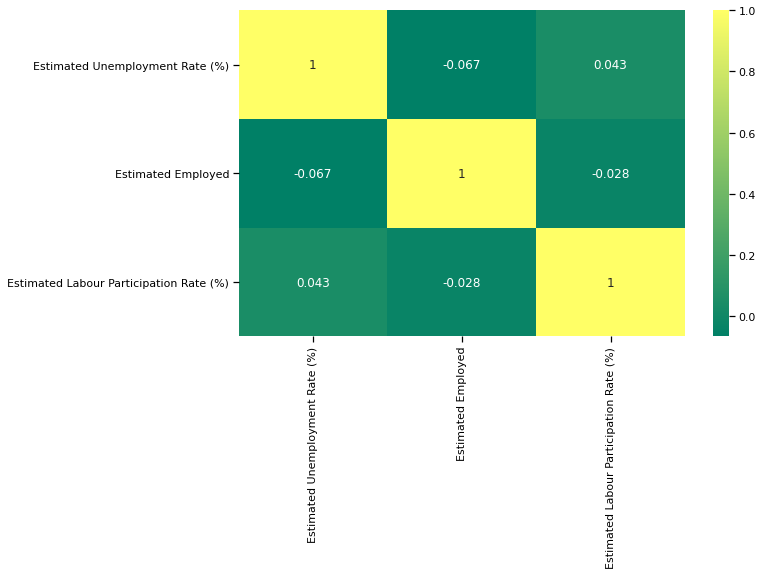

In [141]:
heat_maps = df[['Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

In [162]:
graph = px.box(df,x='Region',y='Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',template='plotly')
graph.update_layout(xaxis={'categoryorder':'total descending'})
graph.show()

### Analysing the effect on unemployment before and after first lockdown in 2020

In [151]:
start_lock = datetime.datetime(2020, 4, 1)
end_lock = datetime.datetime(2020, 7, 31)
start_before_lock = datetime.datetime(2020, 1, 1)


df_lock = df[(df['Date'] >= start_lock) & (df['Date'] <= end_lock)]
df_before_lock = df[(df['Date'] >= start_before_lock) & (df['Date'] <= start_lock)]

In [152]:
g_lock = df_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
g_before_lock = df_before_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

g_lock['Unemployment Rate before lockdown'] = g_before_lock['Estimated Unemployment Rate (%)']
g_lock.columns = ['Region','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

g_lock.head(2)

,Region,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,5.700000
1,Assam,6.2450,4.613333


In [153]:
g_lock['percentage change in unemployment'] = 
round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)

In [154]:
plot_per = g_lock.sort_values('percentage change in unemployment')

In [156]:
fig = px.bar(plot_per, x='Region',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

In [158]:
def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x  

In [159]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

In [163]:
graph = px.bar(plot_per, y='Region',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)

graph.show()